In [2]:
import pandas as pd 
import numpy as np 
from  stl import mesh

In [3]:
pip install numpy-stl pandas 

Note: you may need to restart the kernel to use updated packages.


In [5]:
stl_file=r'C:\Users\SDS\Downloads\yon0rep7.stl'

In [11]:
def stl_to_dataFrame(stl_filename): 
    mesh_data=mesh.Mesh.from_file(stl_filename)
    vertices= mesh_data.vectors.reshape((-1,3))
    df=pd.DataFrame(vertices,columns=['x','y','z'])

    return df 

In [9]:
df=stl_to_dataFrame(stl_file)

In [13]:
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

from mpl_toolkits.mplot3d import axes3d

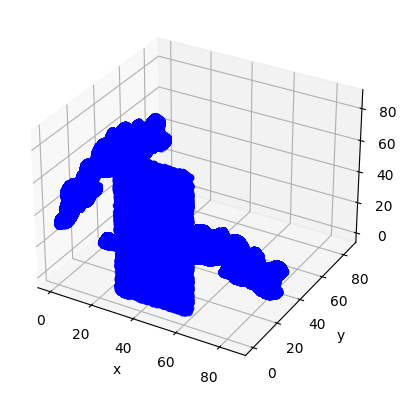

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df['x'],df['y'],df['z'],c='blue',marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [15]:
pip install trimesh


Note: you may need to restart the kernel to use updated packages.


In [29]:
df

,x,y,z,normal_x,normal_y,normal_z
0,236.370117,-44.816338,-20.556585,-0.032702,-0.451781,-0.010502
1,237.864105,-44.926254,-20.480236,0.271309,0.188696,-1.666337
2,237.023590,-44.871445,-20.220791,-0.219134,0.978027,0.317522
3,154.001587,16.761370,-69.877800,-0.020082,-0.073484,-0.394088
4,152.870468,16.030502,-70.144730,-0.056301,-0.987934,-0.066217
...,...,...,...,...,...,...
4710595,113.264435,24.118862,10.055515,0.085834,-0.445994,0.090609
4710596,113.173248,24.144381,9.696280,0.037269,-0.216930,0.046299
4710597,131.706207,-15.958983,-7.841630,-0.041837,0.241459,0.010744
4710598,131.582260,-15.911322,-7.489615,-0.018498,0.153895,0.015627


In [10]:
import os
import pandas as pd
import numpy as np
from trimesh import Trimesh
from skimage import measure

def preprocess_stl(stl_file):
    try:
        # Load STL file
        mesh = Trimesh(file=stl_file)
    except Exception as e:
        print(f"Error loading STL file {stl_file}: {e}")
        return None

    # Check if the mesh is empty
    if mesh.is_empty:
        print(f"Empty mesh for STL file {stl_file}")
        return None

    # Scale and normalize
    mesh.apply_scale(0.1)  # Use apply_scale method instead of scale method

    # Ensure consistent orientation
    mesh.fix_normals()

    # Convert to voxel grid
    voxel_grid = trimesh_to_voxel_grid(mesh, voxel_size=0.01)  # Adjust voxel size as needed

    # Create a dictionary with relevant information
    data_dict = {
        'File_Name': os.path.basename(stl_file),
        'Voxel_Grid': voxel_grid,
        # Add other features as needed
    }

    return data_dict

def trimesh_to_voxel_grid(mesh, voxel_size):
    # Calculate bounding box
    min_bound, max_bound = mesh.bounds

    # Calculate voxel grid dimensions
    dimensions = np.ceil((max_bound - min_bound) / voxel_size).astype(int)

    # Create an empty voxel grid
    voxel_grid = np.zeros(dimensions, dtype=bool)

    # Rasterize mesh into voxel grid
    mesh_voxels = measure.mesh_surface_area(mesh.voxelized(pitch=voxel_size))
    voxel_grid[mesh_voxels] = True

    return voxel_grid

def preprocess_batch_stl(folder_path):
    # List all STL files in the specified folder
    stl_files = [file for file in os.listdir(folder_path) if file.endswith('.stl')]

    # Initialize a list to store preprocessed data
    preprocessed_data_list = []

    # Process each STL file
    for stl_file in stl_files:
        stl_file_path = os.path.join(folder_path, stl_file)
        preprocessed_data = preprocess_stl(stl_file_path)
        
        # Check if preprocess_stl returns None
        if preprocessed_data is not None:
            preprocessed_data_list.append(preprocessed_data)

    # Convert the list of dictionaries to a Pandas DataFrame
    df = pd.DataFrame(preprocessed_data_list)

    return df

# Example usage
folder_path = r'C:\Users\SDS\Downloads'
preprocessed_data_df = preprocess_batch_stl(folder_path)




Empty mesh for STL file C:\Users\SDS\Downloads\51rrx8r1.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv4p7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (2).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o.stl
Empty mesh for STL file C:\Users\SDS\Downloads\yon0rep7.stl


In [14]:
df1=preprocess_batch_stl(folder_path)

Empty mesh for STL file C:\Users\SDS\Downloads\51rrx8r1.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv4p7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7 (2).stl
Empty mesh for STL file C:\Users\SDS\Downloads\6o3yv8q7.stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o (1).stl
Empty mesh for STL file C:\Users\SDS\Downloads\voq25d5o.stl
Empty mesh for STL file C:\Users\SDS\Downloads\yon0rep7.stl


In [5]:
pip install scikit-image


     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.2 MB 640.0 kB/s eta 0:00:07
      --------------------------------------- 0.1/4.2 MB 558.5 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.2 MB 558.5 kB/s eta 0:00:08
      --------------------------------------- 0.1/4.2 MB 435.7 kB/s eta 0:00:10
     - -------------------------------------- 0.1/4.2 MB 450.6 kB/s eta 0:00:09
     - -------------------------------------- 0.2/4.2 MB 482.7 kB/s eta 0:00:09
     - -------------------------------------- 0.2/4.2 MB 499.5 kB/s eta 0:00:09
     - -------------------------------------- 0.2/4.2 MB 478.0 kB/s eta 0:00:09
     -- ------------------------------------- 0.2/4.2 MB 497.3 kB/s eta 0:00:08
     -- ------------------------------------- 0.3/4.2 MB 532.5 kB/s eta 0:00:08
     -- ------------------------------------- 0.3/4.2 MB 519.7 kB/s eta 0:00:08
     -- ------------------------------------- 0.3

In [3]:
folder_path=r'C:\Users\SDS\Downloads'

In [22]:
pip install networkx


     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 259.2 kB/s eta 0:00:08
     - -------------------------------------- 0.1/2.1 MB 409.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/2.1 MB 476.3 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 552.2 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.1 MB 5

In [25]:
preprocessed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [21]:
folder=r'E:\3D\stlfilesfree'

In [30]:
import os
from stl import mesh
import pandas as pd

def stl_to_dataframe(file_path):
    try:
        # Load the STL file
        your_mesh = mesh.Mesh.from_file(file_path)

        # Flatten the vertices array
        vertices_flat = your_mesh.vectors.reshape(-1, 3)

        # Flatten the normals array
        normals_flat = your_mesh.normals.repeat(3, axis=0)

        # Create DataFrame
        df = pd.DataFrame({
            'x': vertices_flat[:, 0],
            'y': vertices_flat[:, 1],
            'z': vertices_flat[:, 2],
            'normal_x': normals_flat[:, 0],
            'normal_y': normals_flat[:, 1],
            'normal_z': normals_flat[:, 2]
        })

        return df
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None






In [32]:
folder_path = folder # Change this to your folder path
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.stl')]

dfs = []

for file_path in file_paths:
    df = stl_to_dataframe(file_path)
    if df is not None:
        dfs.append(df)

if dfs:  # Check if any valid DataFrames were generated
    combined_df = pd.concat(dfs, axis=1)
    print(combined_df)
else:
    print("No valid STL files found.")



                  x          y          z  normal_x  normal_y  normal_z  \
0        121.710846  10.768318  49.562504  0.077000 -0.058207  0.149222   
1        121.885895  11.052930  49.583195  0.077000 -0.058207  0.149222   
2        121.379562  11.082143  49.855862  0.077000 -0.058207  0.149222   
3        121.920235  13.677420  49.974007 -0.008005  0.102076  0.159577   
4        121.851990  14.181907  49.647881 -0.008005  0.102076  0.159577   
...             ...        ...        ...       ...       ...       ...   
6693583  146.359711 -58.911549 -60.783154  0.082050 -0.047871 -0.026005   
6693584  146.533936 -58.622421 -60.765686  0.082050 -0.047871 -0.026005   
6693585  146.533936 -58.622421 -60.765686  0.164123 -0.084549 -0.040927   
6693586  146.735046 -58.445118 -60.325481  0.164123 -0.084549 -0.040927   
6693587  146.464203 -58.887402 -60.497910  0.164123 -0.084549 -0.040927   

                 x          y         z  normal_x  ...         z  normal_x  \
0        15.758559  3